In [92]:
# Install the required libraries
!pip install prophet

In [93]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [94]:
home_ownership_rate = pd.read_csv("Home Ownership Rate (Hamilton, OH) - Home Ownership Rate.csv")
us_census = pd.read_csv("US Census (Hamilton, OH) - Sheet1.csv")
home_value_forecast = pd.read_csv("Home Value Forecast - Sheet1.csv")
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")
zestimate = pd.read_csv("Zillow Housing Estimate Index - Sheet1.csv")
wood_prices = pd.read_csv("wood_prices_dataset.csv")


In [95]:
##Homeownership Rate 

In [96]:
display(home_ownership_rate.head())



,DATE,HOWNRATEACS039061
0,1/1/2009,67.089647
1,1/1/2010,65.820411
2,1/1/2011,65.362558
3,1/1/2012,64.354125
4,1/1/2013,63.293043


In [97]:
home_ownership_rate = home_ownership_rate.rename(columns={"DATE":"Date", "HOWNRATEACS039061":"Homeownership Rate"})
home_ownership_rate.head()

,Date,Homeownership Rate
0,1/1/2009,67.089647
1,1/1/2010,65.820411
2,1/1/2011,65.362558
3,1/1/2012,64.354125
4,1/1/2013,63.293043


In [98]:
x_axis = np.arange(len(home_ownership_rate))
tick_locations = [value for value in x_axis]

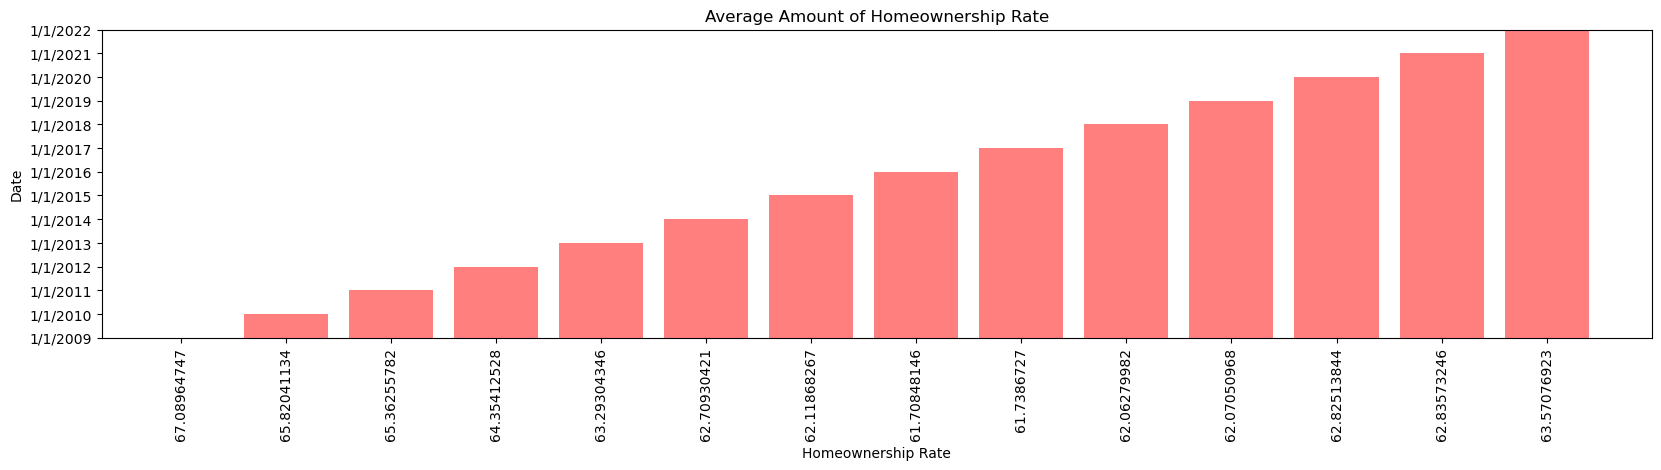

<Figure size 640x480 with 0 Axes>

In [99]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, home_ownership_rate["Date"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, home_ownership_rate["Homeownership Rate"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(home_ownership_rate["Date"]))

# Set a Title and labels
plt.title("Average Amount of Homeownership Rate")
plt.xlabel("Homeownership Rate")
plt.ylabel("Date")
plt.show()

# Save our graph and show the grap
plt.tight_layout()
plt.show()

In [100]:
## Wood Prices

In [101]:
display(wood_prices)

,Wood Type,Country,Price (USD),Supply Source,Quality Rating,Popularity,Demand Level,Availability
0,Maple,China,166.59,Imported,Medium,3,Medium,Moderate
1,Rosewood,South Africa,144.71,Local,Low,6,Medium,Moderate
2,Rosewood,South Africa,216.92,Local,Medium,2,Medium,Abundant
3,Oak,Russia,130.13,Imported,Medium,5,Low,Abundant
4,Bamboo,Australia,114.66,Local,Medium,8,Low,Abundant
...,...,...,...,...,...,...,...,...
995,Rosewood,Indonesia,151.81,Local,Medium,2,Medium,Limited
996,Pine,Germany,230.97,Imported,Low,4,Low,Abundant
997,Maple,Indonesia,200.87,Local,Low,4,High,Limited
998,Maple,South Africa,227.75,Imported,Low,8,High,Moderate


In [102]:
x_axis = np.arange(len(wood_prices))
tick_locations = [value for value in x_axis]

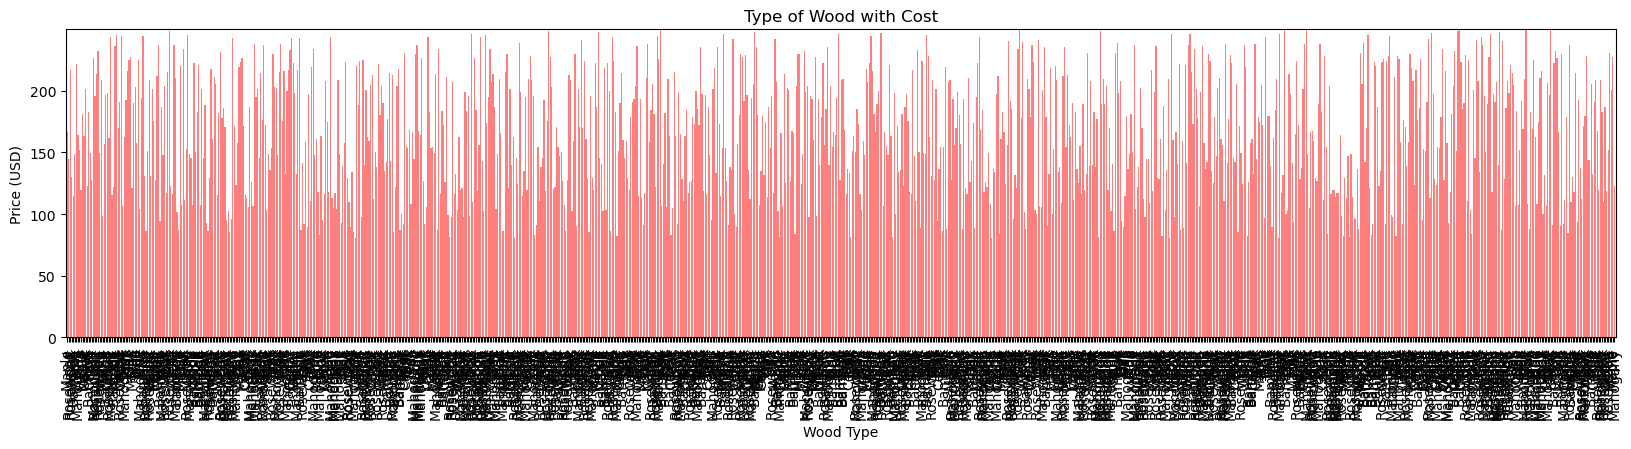

<Figure size 640x480 with 0 Axes>

In [103]:
#try countriess bc it has lower numbers , plot means of price based on countires /avalibliility/ quality  , price range diff from local and inported wood 


plt.figure(figsize=(20,4))
plt.bar(x_axis, wood_prices["Price (USD)"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, wood_prices["Wood Type"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(wood_prices["Price (USD)"]))

# Set a Title and labels
plt.title("Type of Wood with Cost")
plt.xlabel("Wood Type")
plt.ylabel("Price (USD)")
plt.show()

# Save our graph and show the grap
plt.tight_layout()
plt.show()

<Axes: >

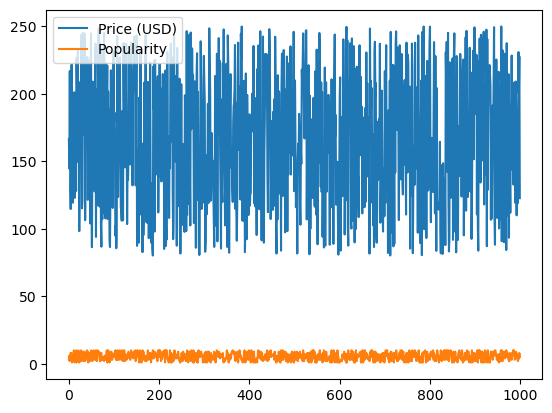

In [104]:
wood_prices.plot()

In [105]:
##US Census

In [106]:


us_census_transposed = us_census.set_index("Fact").transpose()

display(us_census_transposed)



Fact,"Population estimates, July 1, 2023, (V2023)","Population Estimates, July 1, 2022, (V2022)","Population estimates base, April 1, 2020, (V2023)","Population estimates base, April 1, 2020, (V2022)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2022, (V2022)","Population, Census, April 1, 2020","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent",...,Value Flags,-,F,D,N,FN,X,S,NaN,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Either no or too few sample observations were ...,Fewer than 25 firms,Suppressed to avoid disclosure of confidential...,Data for this geographic area cannot be displa...,Footnote on this item in place of data,Not applicable,Suppressed; does not meet publication standards,Not available,Value greater than zero but less than half uni...
"Hamilton County, Ohio",NaN,"825,037",NaN,"830,625",NaN,-0.70%,"830,639","802,374",6.10%,22.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Value Note for Hamilton County, Ohio",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
us_census_transposed.count()

Fact
Population estimates, July 1, 2023, (V2023)                                             0
Population Estimates, July 1, 2022, (V2022)                                             1
Population estimates base, April 1, 2020, (V2023)                                       0
Population estimates base, April 1, 2020, (V2022)                                       1
Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)    0
                                                                                       ..
FN                                                                                      1
X                                                                                       1
S                                                                                       1
NaN                                                                                     1
Z                                                                                       1
Lengt

In [108]:
#us_census_transposed.isnull().mean() * 100

In [109]:
us_census_transposed=us_census_transposed.dropna()

In [110]:
us_census_transposed.isnull().sum()

Fact
Population estimates, July 1, 2023, (V2023)                                             0.0
Population Estimates, July 1, 2022, (V2022)                                             0.0
Population estimates base, April 1, 2020, (V2023)                                       0.0
Population estimates base, April 1, 2020, (V2022)                                       0.0
Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)    0.0
                                                                                       ... 
FN                                                                                      0.0
X                                                                                       0.0
S                                                                                       0.0
NaN                                                                                     0.0
Z                                                                          

In [111]:
display(us_census_transposed)

Fact,"Population estimates, July 1, 2023, (V2023)","Population Estimates, July 1, 2022, (V2022)","Population estimates base, April 1, 2020, (V2023)","Population estimates base, April 1, 2020, (V2022)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2022, (V2022)","Population, Census, April 1, 2020","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent",...,Value Flags,-,F,D,N,FN,X,S,NaN,Z


In [112]:
##Home Values Forecast with Zillow 

In [113]:
display(home_value_forecast)

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,12/31/2023,2/29/2024,11/30/2024
0,102001,0,United States,country,NaN,11/30/2023,0.1,0.0,0.0
1,394913,1,"New York, NY",msa,NY,11/30/2023,0.1,-0.5,-2.9
2,753899,2,"Los Angeles, CA",msa,CA,11/30/2023,0.3,-1.0,-2.2
3,394463,3,"Chicago, IL",msa,IL,11/30/2023,0.1,-0.3,-2.2
4,394514,4,"Dallas, TX",msa,TX,11/30/2023,-0.2,-0.8,-0.8
...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,11/30/2023,-1.6,-3.9,-9.5
891,394743,936,"Ketchikan, AK",msa,AK,11/30/2023,-0.5,-1.0,-3.8
892,753874,937,"Craig, CO",msa,CO,11/30/2023,0.0,-0.3,1.0
893,395188,938,"Vernon, TX",msa,TX,11/30/2023,-1.3,-2.8,-5.0


In [114]:
##Metro Sales Count 

In [115]:
display(metro_sales_count)

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,102001,0,United States,country,NaN,205206,238071,264215,290180,304596,...,236545,324071,299951,360423,381898,327706.0,356022.0,307974.0,291856.0,256938
1,394913,1,"New York, NY",msa,NY,8591,8967,9977,10232,10854,...,8915,11164,10446,12425,14692,13076.0,15184.0,12678.0,12449.0,10864
2,753899,2,"Los Angeles, CA",msa,CA,4159,5058,6075,6903,7242,...,4634,6728,6033,7180,7319,6223.0,6964.0,5742.0,5791.0,4965
3,394463,3,"Chicago, IL",msa,IL,5933,7454,7716,8388,9313,...,5744,8927,8633,10623,11254,9655.0,10521.0,8840.0,8601.0,7128
4,394514,4,"Dallas, TX",msa,TX,5058,5733,6228,6909,6913,...,5294,6831,6500,7941,7816,6886.0,7067.0,5686.0,5283.0,4779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,363,353,454,450,445,...,464,578,585,636,626,592.0,606.0,494.0,436.0,410
90,395160,93,"Toledo, OH",msa,OH,336,365,442,479,488,...,462,553,640,671,789,634.0,757.0,566.0,640.0,574
91,395224,94,"Wichita, KS",msa,KS,236,369,360,277,447,...,186,284,228,243,327,264.0,284.0,282.0,251.0,100
92,394549,95,"Durham, NC",msa,NC,418,528,556,792,794,...,478,747,683,785,907,675.0,736.0,639.0,588.0,530


In [116]:
## New Construction Sales Data

In [117]:
new_construction_sales.shape
display(new_construction_sales)




,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
0,102001,0,United States,country,NaN,37066.0,36475.0,46872.0,41641.0,44494.0,...,24569.0,31273.0,42895.0,37818.0,42978.0,42341.0,34096.0,37166.0,33917.0,31641.0
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,394548,641,"Durant, OK",msa,OK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,12.0,11.0,6.0,7.0,8.0
316,394567,663,"Ellensburg, WA",msa,WA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.0,10.0,15.0,13.0,9.0,13.0,17.0,16.0
317,394476,704,"Clewiston, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,12.0,14.0,21.0,10.0,20.0,15.0,12.0,11.0,25.0,14.0
318,394713,768,"Jackson, WY",msa,WY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,7.0,9.0,6.0,6.0


In [118]:
new_construction_sales.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
0,102001,0,United States,country,NaN,37066.0,36475.0,46872.0,41641.0,44494.0,...,24569.0,31273.0,42895.0,37818.0,42978.0,42341.0,34096.0,37166.0,33917.0,31641.0
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0


In [119]:
new_construction_sales.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2018', '2/28/2018', '3/31/2018', '4/30/2018', '5/31/2018',
       '6/30/2018', '7/31/2018', '8/31/2018', '9/30/2018', '10/31/2018',
       '11/30/2018', '12/31/2018', '1/31/2019', '2/28/2019', '3/31/2019',
       '4/30/2019', '5/31/2019', '6/30/2019', '7/31/2019', '8/31/2019',
       '9/30/2019', '10/31/2019', '11/30/2019', '12/31/2019', '1/31/2020',
       '2/29/2020', '3/31/2020', '4/30/2020', '5/31/2020', '6/30/2020',
       '7/31/2020', '8/31/2020', '9/30/2020', '10/31/2020', '11/30/2020',
       '12/31/2020', '1/31/2021', '2/28/2021', '3/31/2021', '4/30/2021',
       '5/31/2021', '6/30/2021', '7/31/2021', '8/31/2021', '9/30/2021',
       '10/31/2021', '11/30/2021', '12/31/2021', '1/31/2022', '2/28/2022',
       '3/31/2022', '4/30/2022', '5/31/2022', '6/30/2022', '7/31/2022',
       '8/31/2022', '9/30/2022', '10/31/2022', '11/30/2022', '12/31/2022',
       '1/31/2023', '2/28/2023', '3/31/2023', '4/

In [120]:
new_construction_sales.count()

RegionID      320
SizeRank      320
RegionName    320
RegionType    320
StateName     319
             ... 
6/30/2023     287
7/31/2023     292
8/31/2023     297
9/30/2023     301
10/31/2023    318
Length: 75, dtype: int64

In [121]:
new_construction_sales.isnull().mean() * 100

RegionID       0.0000
SizeRank       0.0000
RegionName     0.0000
RegionType     0.0000
StateName      0.3125
               ...   
6/30/2023     10.3125
7/31/2023      8.7500
8/31/2023      7.1875
9/30/2023      5.9375
10/31/2023     0.6250
Length: 75, dtype: float64

In [122]:
new_construction_sales = new_construction_sales.dropna()

In [123]:
new_construction_sales.isnull().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
6/30/2023     0
7/31/2023     0
8/31/2023     0
9/30/2023     0
10/31/2023    0
Length: 75, dtype: int64

In [124]:
display(new_construction_sales)
#The number of unique new construction homes that sold during the month. for the dates 

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
5,394692,5,"Houston, TX",msa,TX,1365.0,1679.0,1877.0,1850.0,1798.0,...,1343.0,1859.0,2328.0,1986.0,2206.0,2142.0,1701.0,1716.0,1702.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,394674,467,"Heber, UT",msa,UT,20.0,36.0,40.0,30.0,31.0,...,32.0,62.0,47.0,29.0,32.0,39.0,33.0,36.0,54.0,55.0
289,394298,473,"Aberdeen, WA",msa,WA,20.0,20.0,21.0,22.0,24.0,...,8.0,15.0,14.0,10.0,8.0,6.0,9.0,8.0,5.0,11.0
290,753893,477,"Jefferson, GA",msa,GA,55.0,89.0,130.0,81.0,84.0,...,63.0,79.0,118.0,99.0,105.0,104.0,92.0,67.0,77.0,93.0
303,395122,576,"St. Marys, GA",msa,GA,30.0,19.0,32.0,45.0,35.0,...,13.0,19.0,26.0,18.0,26.0,30.0,18.0,29.0,24.0,25.0


In [125]:
#multiple reg analysis, create list for dates , time series analysis (medium.com), json data format open up list copy and paste dates into it
#range function (ref data frame then select range) python

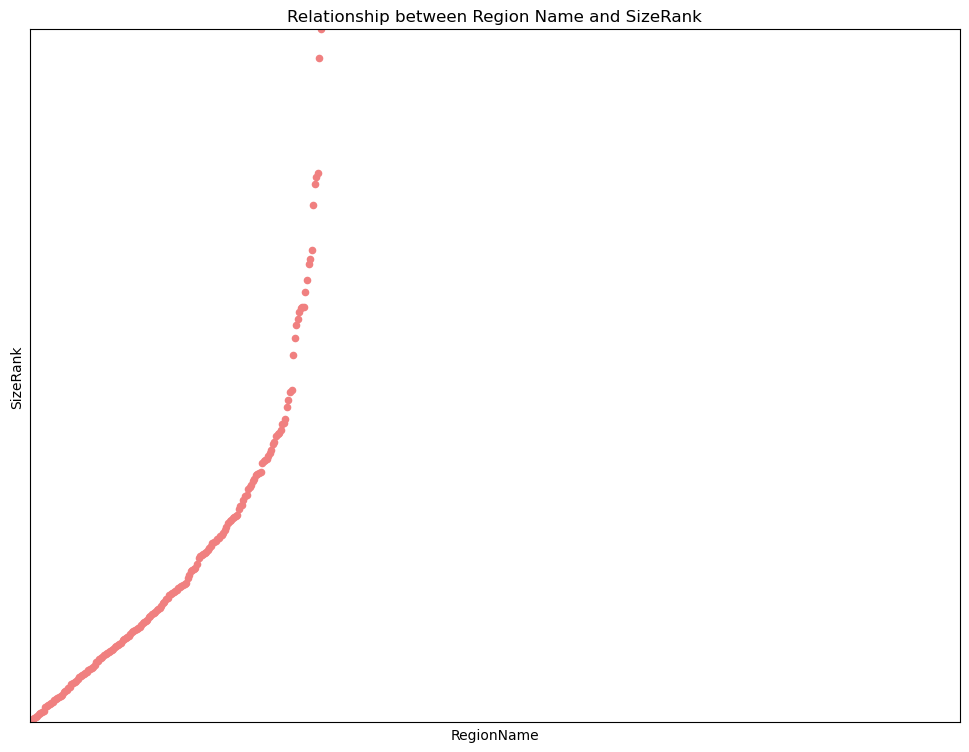

In [126]:
# Scatterplot of RegionName and dates
new_construction_sales_visual = new_construction_sales.plot.scatter(x="RegionName",y="SizeRank",title="Relationship between Region Name and SizeRank", figsize=(12,9),
                                           xlabel="RegionName",ylabel="SizeRank",color="lightcoral",
                                          xlim=(1,601),ylim=(1,601),xticks=(),yticks=())

In [127]:
display(new_construction_sales)

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
5,394692,5,"Houston, TX",msa,TX,1365.0,1679.0,1877.0,1850.0,1798.0,...,1343.0,1859.0,2328.0,1986.0,2206.0,2142.0,1701.0,1716.0,1702.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,394674,467,"Heber, UT",msa,UT,20.0,36.0,40.0,30.0,31.0,...,32.0,62.0,47.0,29.0,32.0,39.0,33.0,36.0,54.0,55.0
289,394298,473,"Aberdeen, WA",msa,WA,20.0,20.0,21.0,22.0,24.0,...,8.0,15.0,14.0,10.0,8.0,6.0,9.0,8.0,5.0,11.0
290,753893,477,"Jefferson, GA",msa,GA,55.0,89.0,130.0,81.0,84.0,...,63.0,79.0,118.0,99.0,105.0,104.0,92.0,67.0,77.0,93.0
303,395122,576,"St. Marys, GA",msa,GA,30.0,19.0,32.0,45.0,35.0,...,13.0,19.0,26.0,18.0,26.0,30.0,18.0,29.0,24.0,25.0


In [128]:
new_construction_sales_visual = new_construction_sales.drop(['RegionID','SizeRank','RegionType','StateName'], axis=1)
display(new_construction_sales_visual)

,RegionName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
1,"New York, NY",516.0,435.0,533.0,500.0,570.0,636.0,580.0,586.0,466.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,"Los Angeles, CA",418.0,430.0,668.0,499.0,521.0,562.0,498.0,564.0,384.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,"Chicago, IL",345.0,346.0,435.0,479.0,562.0,472.0,435.0,444.0,398.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,"Dallas, TX",1510.0,1637.0,2201.0,1928.0,1770.0,1470.0,1563.0,1664.0,1432.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
5,"Houston, TX",1365.0,1679.0,1877.0,1850.0,1798.0,1612.0,1353.0,1684.0,1331.0,...,1343.0,1859.0,2328.0,1986.0,2206.0,2142.0,1701.0,1716.0,1702.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,"Heber, UT",20.0,36.0,40.0,30.0,31.0,24.0,24.0,27.0,29.0,...,32.0,62.0,47.0,29.0,32.0,39.0,33.0,36.0,54.0,55.0
289,"Aberdeen, WA",20.0,20.0,21.0,22.0,24.0,22.0,16.0,15.0,17.0,...,8.0,15.0,14.0,10.0,8.0,6.0,9.0,8.0,5.0,11.0
290,"Jefferson, GA",55.0,89.0,130.0,81.0,84.0,77.0,72.0,57.0,58.0,...,63.0,79.0,118.0,99.0,105.0,104.0,92.0,67.0,77.0,93.0
303,"St. Marys, GA",30.0,19.0,32.0,45.0,35.0,49.0,38.0,31.0,28.0,...,13.0,19.0,26.0,18.0,26.0,30.0,18.0,29.0,24.0,25.0


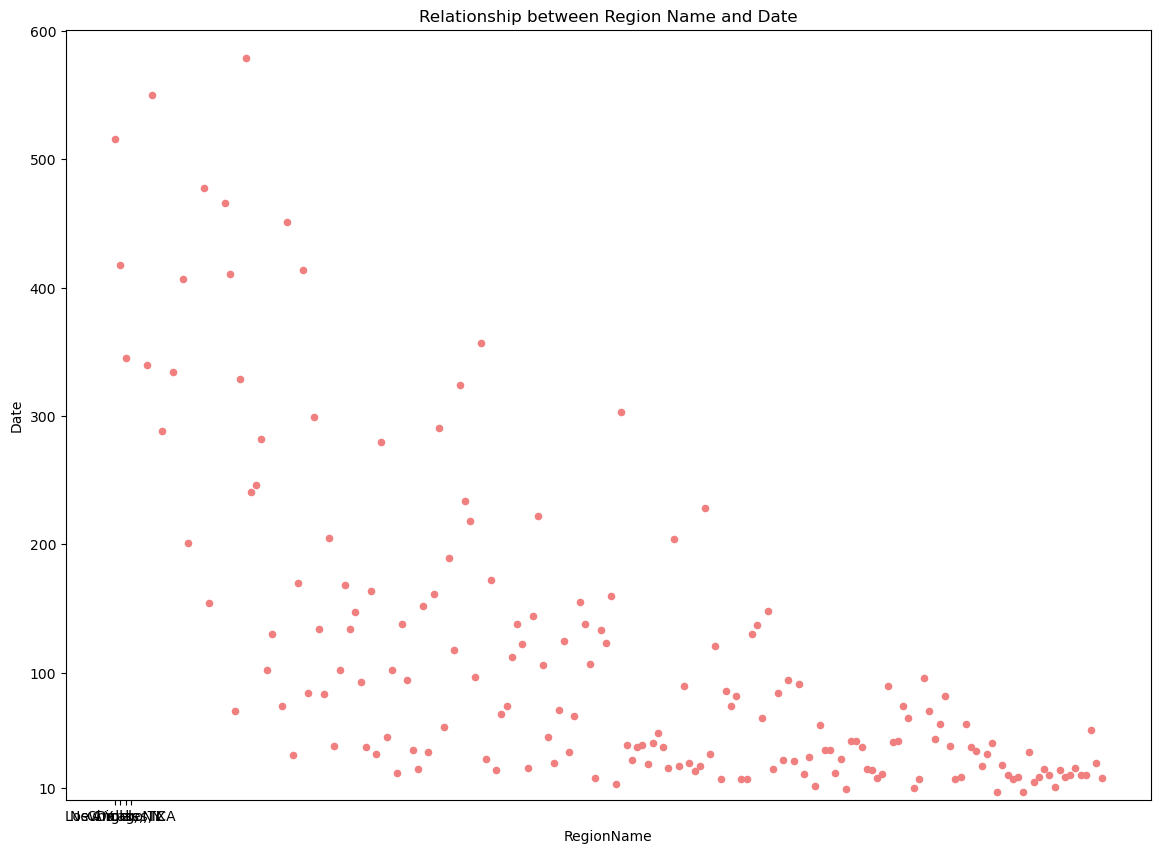

In [129]:
#do not use scatter plot (only when two continuous numbers being compaird), use box/violin plot
#number of new constructions y lable 
new_construction_sales_visual = new_construction_sales.plot.scatter(x="RegionName",y="1/31/2018",title="Relationship between Region Name and Date", figsize=(14,10),
                                           xlabel="RegionName",ylabel="Date",color="lightcoral",
                                          ylim=(1,601),xticks=("New York, NY", "Los Angeles, CA", "Chicago, IL", "Dallas, TX"),yticks=(10, 100, 200, 300, 400, 500, 600, 700, 1000))

In [130]:
display(new_construction_sales)

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
1,394913,1,"New York, NY",msa,NY,516.0,435.0,533.0,500.0,570.0,...,273.0,306.0,389.0,308.0,405.0,429.0,330.0,421.0,363.0,350.0
2,753899,2,"Los Angeles, CA",msa,CA,418.0,430.0,668.0,499.0,521.0,...,124.0,160.0,228.0,162.0,200.0,216.0,159.0,158.0,176.0,169.0
3,394463,3,"Chicago, IL",msa,IL,345.0,346.0,435.0,479.0,562.0,...,276.0,325.0,493.0,465.0,457.0,496.0,400.0,502.0,430.0,388.0
4,394514,4,"Dallas, TX",msa,TX,1510.0,1637.0,2201.0,1928.0,1770.0,...,1206.0,1742.0,2217.0,1932.0,2056.0,1968.0,1566.0,1717.0,1506.0,1391.0
5,394692,5,"Houston, TX",msa,TX,1365.0,1679.0,1877.0,1850.0,1798.0,...,1343.0,1859.0,2328.0,1986.0,2206.0,2142.0,1701.0,1716.0,1702.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,394674,467,"Heber, UT",msa,UT,20.0,36.0,40.0,30.0,31.0,...,32.0,62.0,47.0,29.0,32.0,39.0,33.0,36.0,54.0,55.0
289,394298,473,"Aberdeen, WA",msa,WA,20.0,20.0,21.0,22.0,24.0,...,8.0,15.0,14.0,10.0,8.0,6.0,9.0,8.0,5.0,11.0
290,753893,477,"Jefferson, GA",msa,GA,55.0,89.0,130.0,81.0,84.0,...,63.0,79.0,118.0,99.0,105.0,104.0,92.0,67.0,77.0,93.0
303,395122,576,"St. Marys, GA",msa,GA,30.0,19.0,32.0,45.0,35.0,...,13.0,19.0,26.0,18.0,26.0,30.0,18.0,29.0,24.0,25.0


In [131]:
new_construction_sales = new_construction_sales[new_construction_sales['StateName'] == 'OH']
display(new_construction_sales)

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023
28,394466,28,"Cincinnati, OH",msa,OH,329.0,254.0,212.0,192.0,153.0,...,124.0,127.0,183.0,137.0,179.0,141.0,159.0,131.0,118.0,96.0
32,394492,32,"Columbus, OH",msa,OH,246.0,227.0,259.0,231.0,227.0,...,119.0,156.0,270.0,215.0,233.0,201.0,128.0,199.0,167.0,201.0
34,394475,35,"Cleveland, OH",msa,OH,102.0,80.0,100.0,82.0,117.0,...,48.0,72.0,74.0,68.0,66.0,78.0,60.0,60.0,69.0,68.0
72,845158,74,"Dayton, OH",msa,OH,58.0,37.0,51.0,33.0,29.0,...,26.0,39.0,64.0,45.0,36.0,37.0,39.0,35.0,36.0,35.0
81,394304,83,"Akron, OH",msa,OH,33.0,36.0,38.0,26.0,28.0,...,7.0,18.0,10.0,24.0,23.0,22.0,15.0,14.0,22.0,15.0
90,395160,93,"Toledo, OH",msa,OH,26.0,22.0,24.0,29.0,32.0,...,16.0,11.0,21.0,15.0,11.0,25.0,16.0,14.0,21.0,22.0


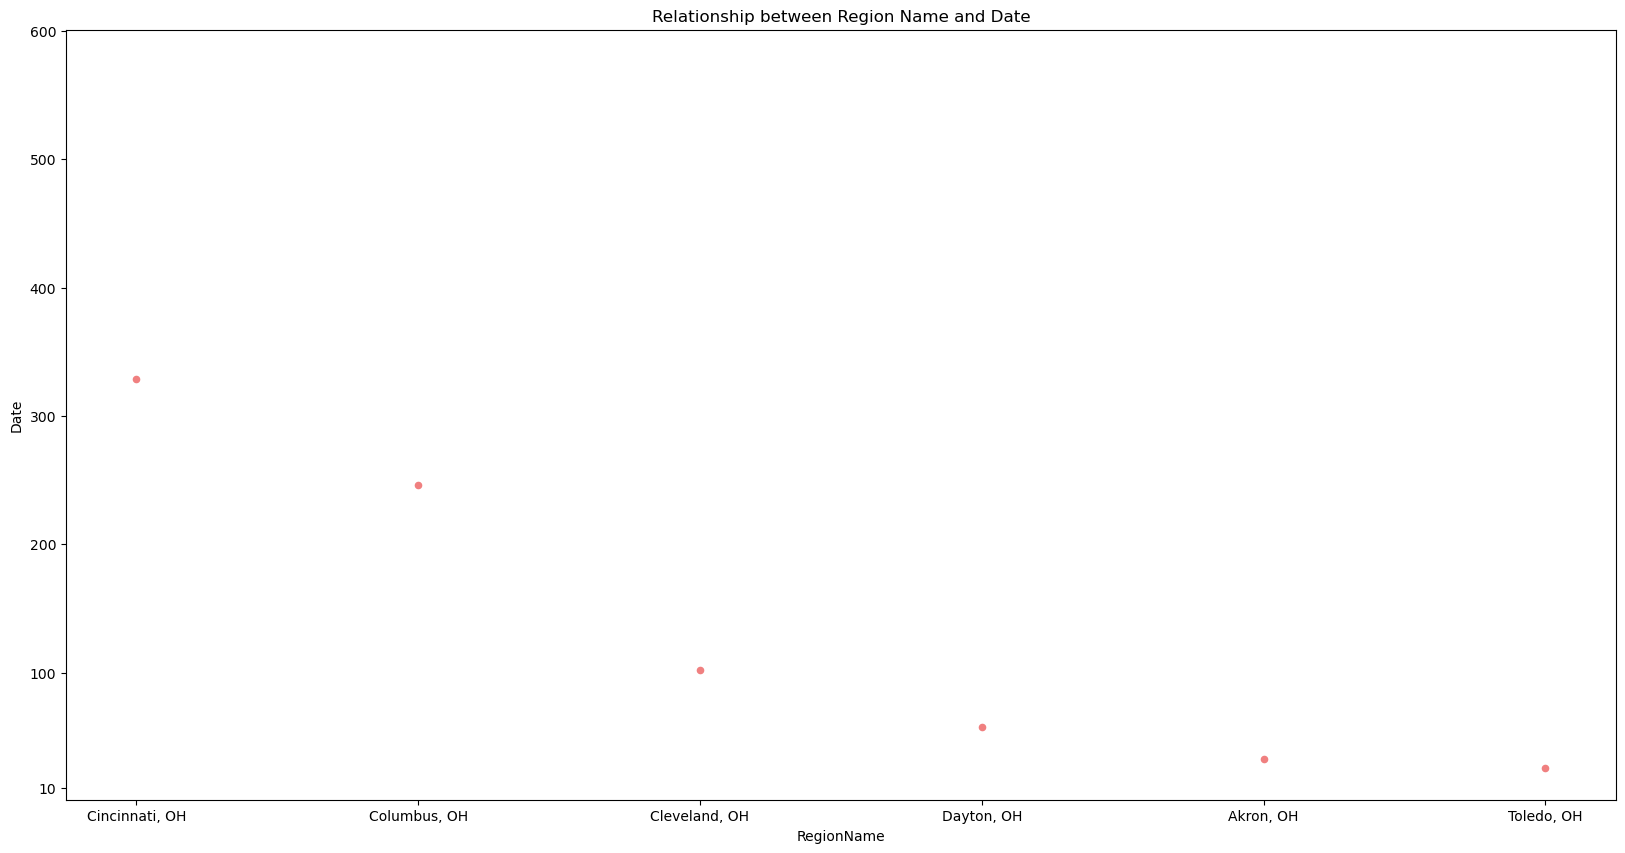

In [132]:
#pre covid post  covid, before march 2020 two agg columns use hue paramenter eto giev color to diff locations 
#bar , location is a cat 
new_construction_sales = new_construction_sales.plot.scatter(x="RegionName",y="1/31/2018",title="Relationship between Region Name and Date", figsize=(20,10),
                                           xlabel="RegionName",ylabel="Date",color="lightcoral",
                                          ylim=(1,601),xticks=("Cincinnati, OH", "Columbus, OH", "Cleveland, OH", "Dayton, OH", "Akron, OH", "Toledo, OH"),yticks=(10, 100, 200, 300, 400, 500, 600, 700, 1000))

In [133]:
display(new_construction_sales)

<Axes: title={'center': 'Relationship between Region Name and Date'}, xlabel='RegionName', ylabel='Date'>

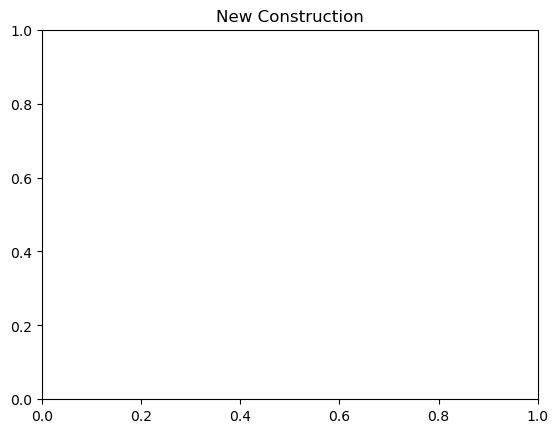

<Figure size 640x480 with 0 Axes>

In [134]:
new_construction_sales_visual.plot(kind="bar", figsize=(13,1), axis=3)

plt.title("New Construction")

plt.show()
plt.tight_layout()

In [135]:
#new_construction_sales = new_construction_sales.loc[(new_construction_sales['StateName']=='OH')]
#new_construction_sales

In [136]:
region = new_construction_sales['RegionName']
region

TypeError: 'Axes' object is not subscriptable

In [ ]:
#dropped non-numerical columns
dates = new_construction_sales.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName', 'RegionName'])
dates

AttributeError: 'Axes' object has no attribute 'drop'

In [ ]:
dates.columns = pd.to_datetime(dates.columns)
dates

,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
28,329.0,254.0,212.0,192.0,153.0,167.0,168.0,141.0,132.0,115.0,...,124.0,127.0,183.0,137.0,179.0,141.0,159.0,131.0,118.0,96.0
32,246.0,227.0,259.0,231.0,227.0,202.0,136.0,119.0,119.0,132.0,...,119.0,156.0,270.0,215.0,233.0,201.0,128.0,199.0,167.0,201.0
34,102.0,80.0,100.0,82.0,117.0,93.0,86.0,86.0,77.0,88.0,...,48.0,72.0,74.0,68.0,66.0,78.0,60.0,60.0,69.0,68.0
72,58.0,37.0,51.0,33.0,29.0,28.0,26.0,19.0,24.0,28.0,...,26.0,39.0,64.0,45.0,36.0,37.0,39.0,35.0,36.0,35.0
81,33.0,36.0,38.0,26.0,28.0,26.0,24.0,31.0,22.0,28.0,...,7.0,18.0,10.0,24.0,23.0,22.0,15.0,14.0,22.0,15.0
90,26.0,22.0,24.0,29.0,32.0,28.0,22.0,22.0,21.0,14.0,...,16.0,11.0,21.0,15.0,11.0,25.0,16.0,14.0,21.0,22.0
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,7.0,5.0,5.0,7.0,8.0,10.0,6.0


In [ ]:
dates['Date'] = ''
dates

,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00,2018-10-31 00:00:00,...,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,Date
28,329.0,254.0,212.0,192.0,153.0,167.0,168.0,141.0,132.0,115.0,...,127.0,183.0,137.0,179.0,141.0,159.0,131.0,118.0,96.0,
32,246.0,227.0,259.0,231.0,227.0,202.0,136.0,119.0,119.0,132.0,...,156.0,270.0,215.0,233.0,201.0,128.0,199.0,167.0,201.0,
34,102.0,80.0,100.0,82.0,117.0,93.0,86.0,86.0,77.0,88.0,...,72.0,74.0,68.0,66.0,78.0,60.0,60.0,69.0,68.0,
72,58.0,37.0,51.0,33.0,29.0,28.0,26.0,19.0,24.0,28.0,...,39.0,64.0,45.0,36.0,37.0,39.0,35.0,36.0,35.0,
81,33.0,36.0,38.0,26.0,28.0,26.0,24.0,31.0,22.0,28.0,...,18.0,10.0,24.0,23.0,22.0,15.0,14.0,22.0,15.0,
90,26.0,22.0,24.0,29.0,32.0,28.0,22.0,22.0,21.0,14.0,...,11.0,21.0,15.0,11.0,25.0,16.0,14.0,21.0,22.0,
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,7.0,5.0,5.0,7.0,8.0,10.0,6.0,


In [ ]:
dates_t = dates.set_index('Date').T
dates_t

Date,,,,,,,
2018-01-31,329.0,246.0,102.0,58.0,33.0,26.0,NaN
2018-02-28,254.0,227.0,80.0,37.0,36.0,22.0,NaN
2018-03-31,212.0,259.0,100.0,51.0,38.0,24.0,NaN
2018-04-30,192.0,231.0,82.0,33.0,26.0,29.0,NaN
2018-05-31,153.0,227.0,117.0,29.0,28.0,32.0,NaN
...,...,...,...,...,...,...,...
2023-06-30,141.0,201.0,78.0,37.0,22.0,25.0,5.0
2023-07-31,159.0,128.0,60.0,39.0,15.0,16.0,7.0
2023-08-31,131.0,199.0,60.0,35.0,14.0,14.0,8.0
2023-09-30,118.0,167.0,69.0,36.0,22.0,21.0,10.0


In [ ]:
dates_t['Date'] = pd.to_datetime(dates_t.index)
dates_t.drop(columns='Date')
dates_t.set_index('Date', inplace=True)

In [ ]:
dates_t.resample('Y').sum()

Date,,,,,,,
Date,,,,,,,
2018-12-31,2091.0,2108.0,1068.0,381.0,355.0,261.0,0.0
2019-12-31,1309.0,1604.0,1013.0,142.0,251.0,229.0,0.0
2020-12-31,1525.0,1361.0,799.0,251.0,187.0,293.0,0.0
2021-12-31,1867.0,2282.0,996.0,320.0,252.0,302.0,0.0
2022-12-31,1674.0,2576.0,1122.0,484.0,482.0,276.0,0.0
2023-12-31,1395.0,1889.0,663.0,392.0,170.0,172.0,53.0


In [ ]:
dates_t.columns = ['Cincinnati','Columbus','Cleveland','Akron','Toledo']
dates_t

ValueError: Length mismatch: Expected axis has 7 elements, new values have 5 elements

Text(0.5, 1.0, 'New Construction')

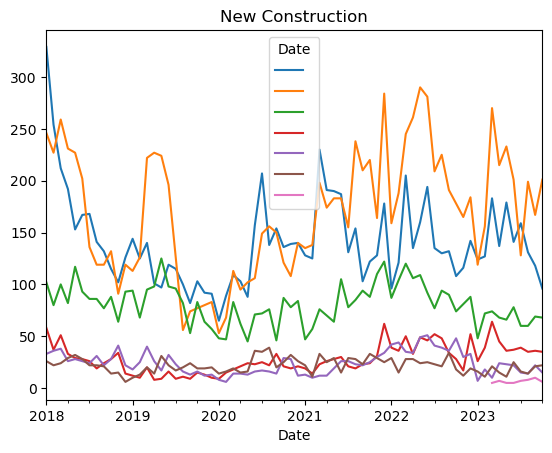

In [ ]:
dates_t.plot()
plt.title("New Construction")

In [ ]:
##Home Sales with Zillow 

In [ ]:
display(zestimate)

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.61750,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.15010,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.61490,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.48360,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.97680,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466
5,395245,106,"Youngstown, OH",msa,OH,78846.49968,78968.95878,79058.55618,79274.35399,79520.85261,...,139620.5781,139972.7287,140639.5712,141548.5983,142712.6911,144024.8686,145231.8579,146259.6555,146988.8720,147447.1261
6,394439,137,"Canton, OH",msa,OH,93464.88584,93713.01354,93900.38725,94322.95721,94803.08974,...,177153.4374,177742.0330,179776.9762,182366.6705,184828.8364,186837.3068,188228.8636,189179.4776,189817.6732,190550.1709
7,394697,151,"Huntington, WV",msa,OH,74249.78097,74228.28892,74289.19580,74429.67737,74720.38554,...,138506.6715,138656.7286,139241.7691,139692.7106,139740.0458,139371.4301,138920.2255,138380.4680,138134.9359,138362.9462
8,395221,309,"Wheeling, WV",msa,OH,56338.01099,56153.78340,56128.10356,56015.82486,56103.22140,...,130946.2114,130140.4508,130286.8201,131159.6922,132151.6330,133127.2428,133699.1879,133786.6503,133503.2316,133261.4540
9,395117,316,"Springfield, OH",msa,OH,74125.36499,74268.83819,74358.40482,74614.91772,74862.29840,...,162084.0043,162520.1140,163556.6362,164937.7227,166557.3155,168069.8795,169519.1880,171000.5993,172354.2430,173396.7155
